Sentiment Distribution:
 Sentiment
Positive    299
Neutral     135
Negative     67
Name: count, dtype: int64

Average Polarity Score: 0.167


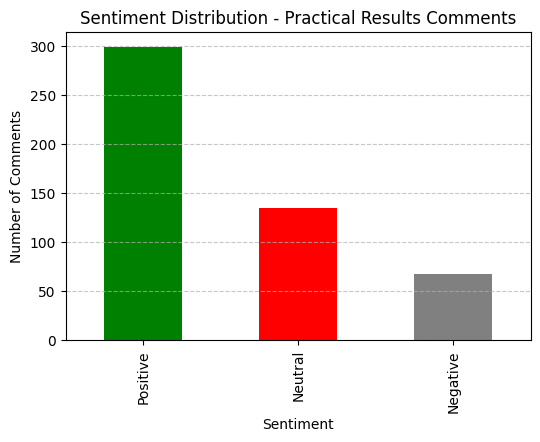


Results saved to Practical_Results.xlsx


In [3]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

df = pd.read_csv("sentiment_1.csv", encoding='latin1')

comments = df[df['content'].notnull() & (df['content'].str.strip() != '')].copy()

def analyze_sentiment(text):
    blob = TextBlob(str(text))
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

comments['Sentiment'] = comments['content'].apply(analyze_sentiment)
comments['Polarity_Score'] = comments['content'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

sentiment_counts = comments['Sentiment'].value_counts()
print("Sentiment Distribution:\n", sentiment_counts)
print(f"\nAverage Polarity Score: {comments['Polarity_Score'].mean():.3f}")

plt.figure(figsize=(6,4))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Sentiment Distribution - Practical Results Comments")
plt.xlabel("Sentiment")
plt.ylabel("Number of Comments")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

comments.to_excel("Practical_Results.xlsx", index=False)
print("\nResults saved to Practical_Results.xlsx")

Sentiment Distribution:
 Sentiment
Positive    299
Neutral     135
Negative     67
Name: count, dtype: int64

Average Polarity Score: 0.167


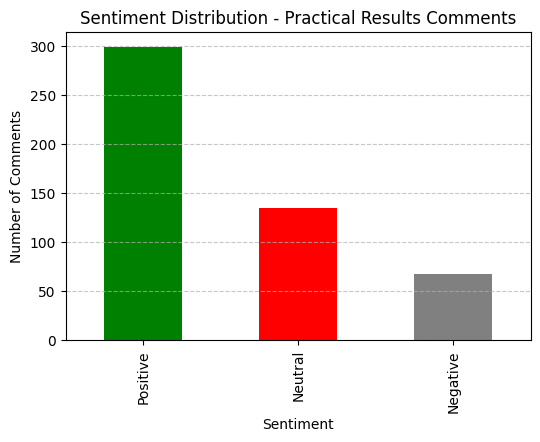

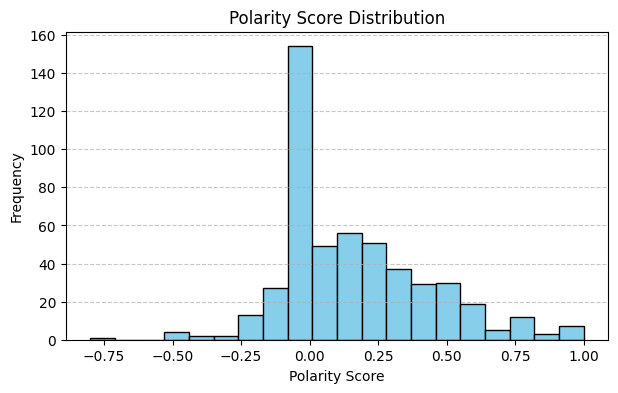

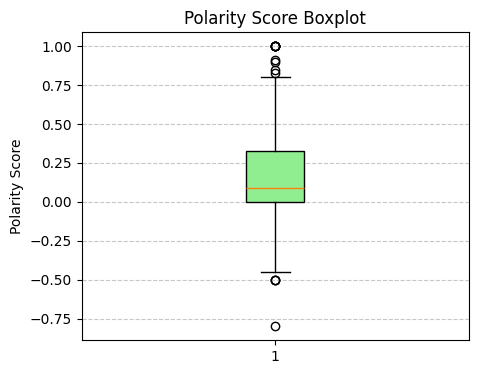

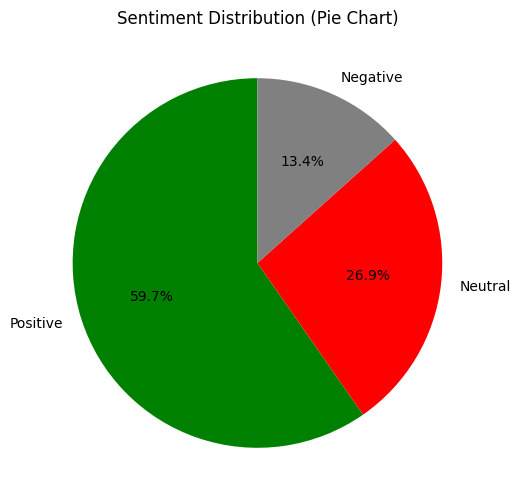


Results saved to Practical_Results.xlsx


In [2]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from collections import Counter
import re

df = pd.read_csv("sentiment_1.csv", encoding='latin1')

comments = df[df['content'].notnull() & (df['content'].str.strip() != '')].copy()

def analyze_sentiment(text):
    blob = TextBlob(str(text))
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

comments['Sentiment'] = comments['content'].apply(analyze_sentiment)
comments['Polarity_Score'] = comments['content'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

sentiment_counts = comments['Sentiment'].value_counts()
print("Sentiment Distribution:\n", sentiment_counts)
print(f"\nAverage Polarity Score: {comments['Polarity_Score'].mean():.3f}")

# 1️⃣ Bar Chart (Already Included)
plt.figure(figsize=(6,4))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Sentiment Distribution - Practical Results Comments")
plt.xlabel("Sentiment")
plt.ylabel("Number of Comments")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2️⃣ Polarity Score Distribution (Histogram)
plt.figure(figsize=(7,4))
plt.hist(comments['Polarity_Score'], bins=20, color='skyblue', edgecolor='black')
plt.title("Polarity Score Distribution")
plt.xlabel("Polarity Score")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3️⃣ Polarity Score Boxplot
plt.figure(figsize=(5,4))
plt.boxplot(comments['Polarity_Score'], vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightgreen'))
plt.title("Polarity Score Boxplot")
plt.ylabel("Polarity Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4️⃣ Sentiment Pie Chart
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index,
        autopct='%1.1f%%', colors=['green','red','gray'], startangle=90)
plt.title("Sentiment Distribution (Pie Chart)")
plt.show()

# 5️⃣ Word Frequency (Top Positive vs Negative Words)
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text.split()

positive_words = []
negative_words = []

for _, row in comments.iterrows():
    words = clean_text(row['content'])
    if row['Sentiment'] == 'Positive':
        positive_words.extend(words)
    elif row['Sentiment'] == 'Negative':
        negative_words.extend(words)

top_pos = Counter(positive_words).most_common(10)
top_neg = Counter(negative_words).most_common(10)

# Save full results
comments.to_excel("Practical_Results.xlsx", index=False)
print("\nResults saved to Practical_Results.xlsx")